In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import annotate
import n_1rxi as method
import plot_utils

In [2]:
chunk_size = 50

In [3]:
fname = method.__file__.split('/')[-1][:-3].replace('x', str(chunk_size)) + '-sonnet'
fname

'n_1r50i-sonnet'

In [4]:
import rate
rate.setkey(0,'claude')

In [5]:
source = annotate.get_clean()

In [6]:
source = source.sample(frac=1, random_state=8)

In [7]:
requests = await method.rate(source, chunk_size=chunk_size)

Request 1 of 90
Request 2 of 90
Request 3 of 90
Request 4 of 90
Request 5 of 90
Request 6 of 90
Request 7 of 90
Request 8 of 90
Request 9 of 90
Request 10 of 90
Request 11 of 90
Request 12 of 90
Request 13 of 90
Request 14 of 90
Request 15 of 90
Request 16 of 90
Request 17 of 90
Request 18 of 90
Request 19 of 90
Request 20 of 90
Request 21 of 90
Request 22 of 90
Request 23 of 90
Request 24 of 90
Request 25 of 90
Request 26 of 90
Request 27 of 90
Request 28 of 90
Request 29 of 90
Request 30 of 90
Request 31 of 90
Request 32 of 90
Request 33 of 90
Request 34 of 90
Request 35 of 90
Request 36 of 90
Request 37 of 90
Request 38 of 90
Request 39 of 90
Request 40 of 90
Request 41 of 90
Request 42 of 90
Request 43 of 90
Request 44 of 90
Request 45 of 90
Request 46 of 90
Request 47 of 90
Request 48 of 90
Request 49 of 90
Request 50 of 90
Request 51 of 90
Request 52 of 90
Request 53 of 90
Request 54 of 90
Request 55 of 90
Request 56 of 90
Request 57 of 90
Request 58 of 90
Request 59 of 90
Reques

In [8]:
method.process(requests)

In [9]:
source.to_excel(f'gpt-ratings/{fname}.xlsx')

In [10]:
source = pd.read_excel(f'gpt-ratings/{fname}.xlsx').set_index('Unnamed: 0')

In [11]:
corr = {key: stats.spearmanr(source[[key.capitalize(), key]]) for key in annotate.measures}
corr

{'novelty': SignificanceResult(statistic=0.6021785498121535, pvalue=1.8271746062579866e-121),
 'feasibility': SignificanceResult(statistic=0.5722147033600214, pvalue=3.314258359501711e-107),
 'value': SignificanceResult(statistic=0.3071169976473238, pvalue=4.191646987414527e-28)}

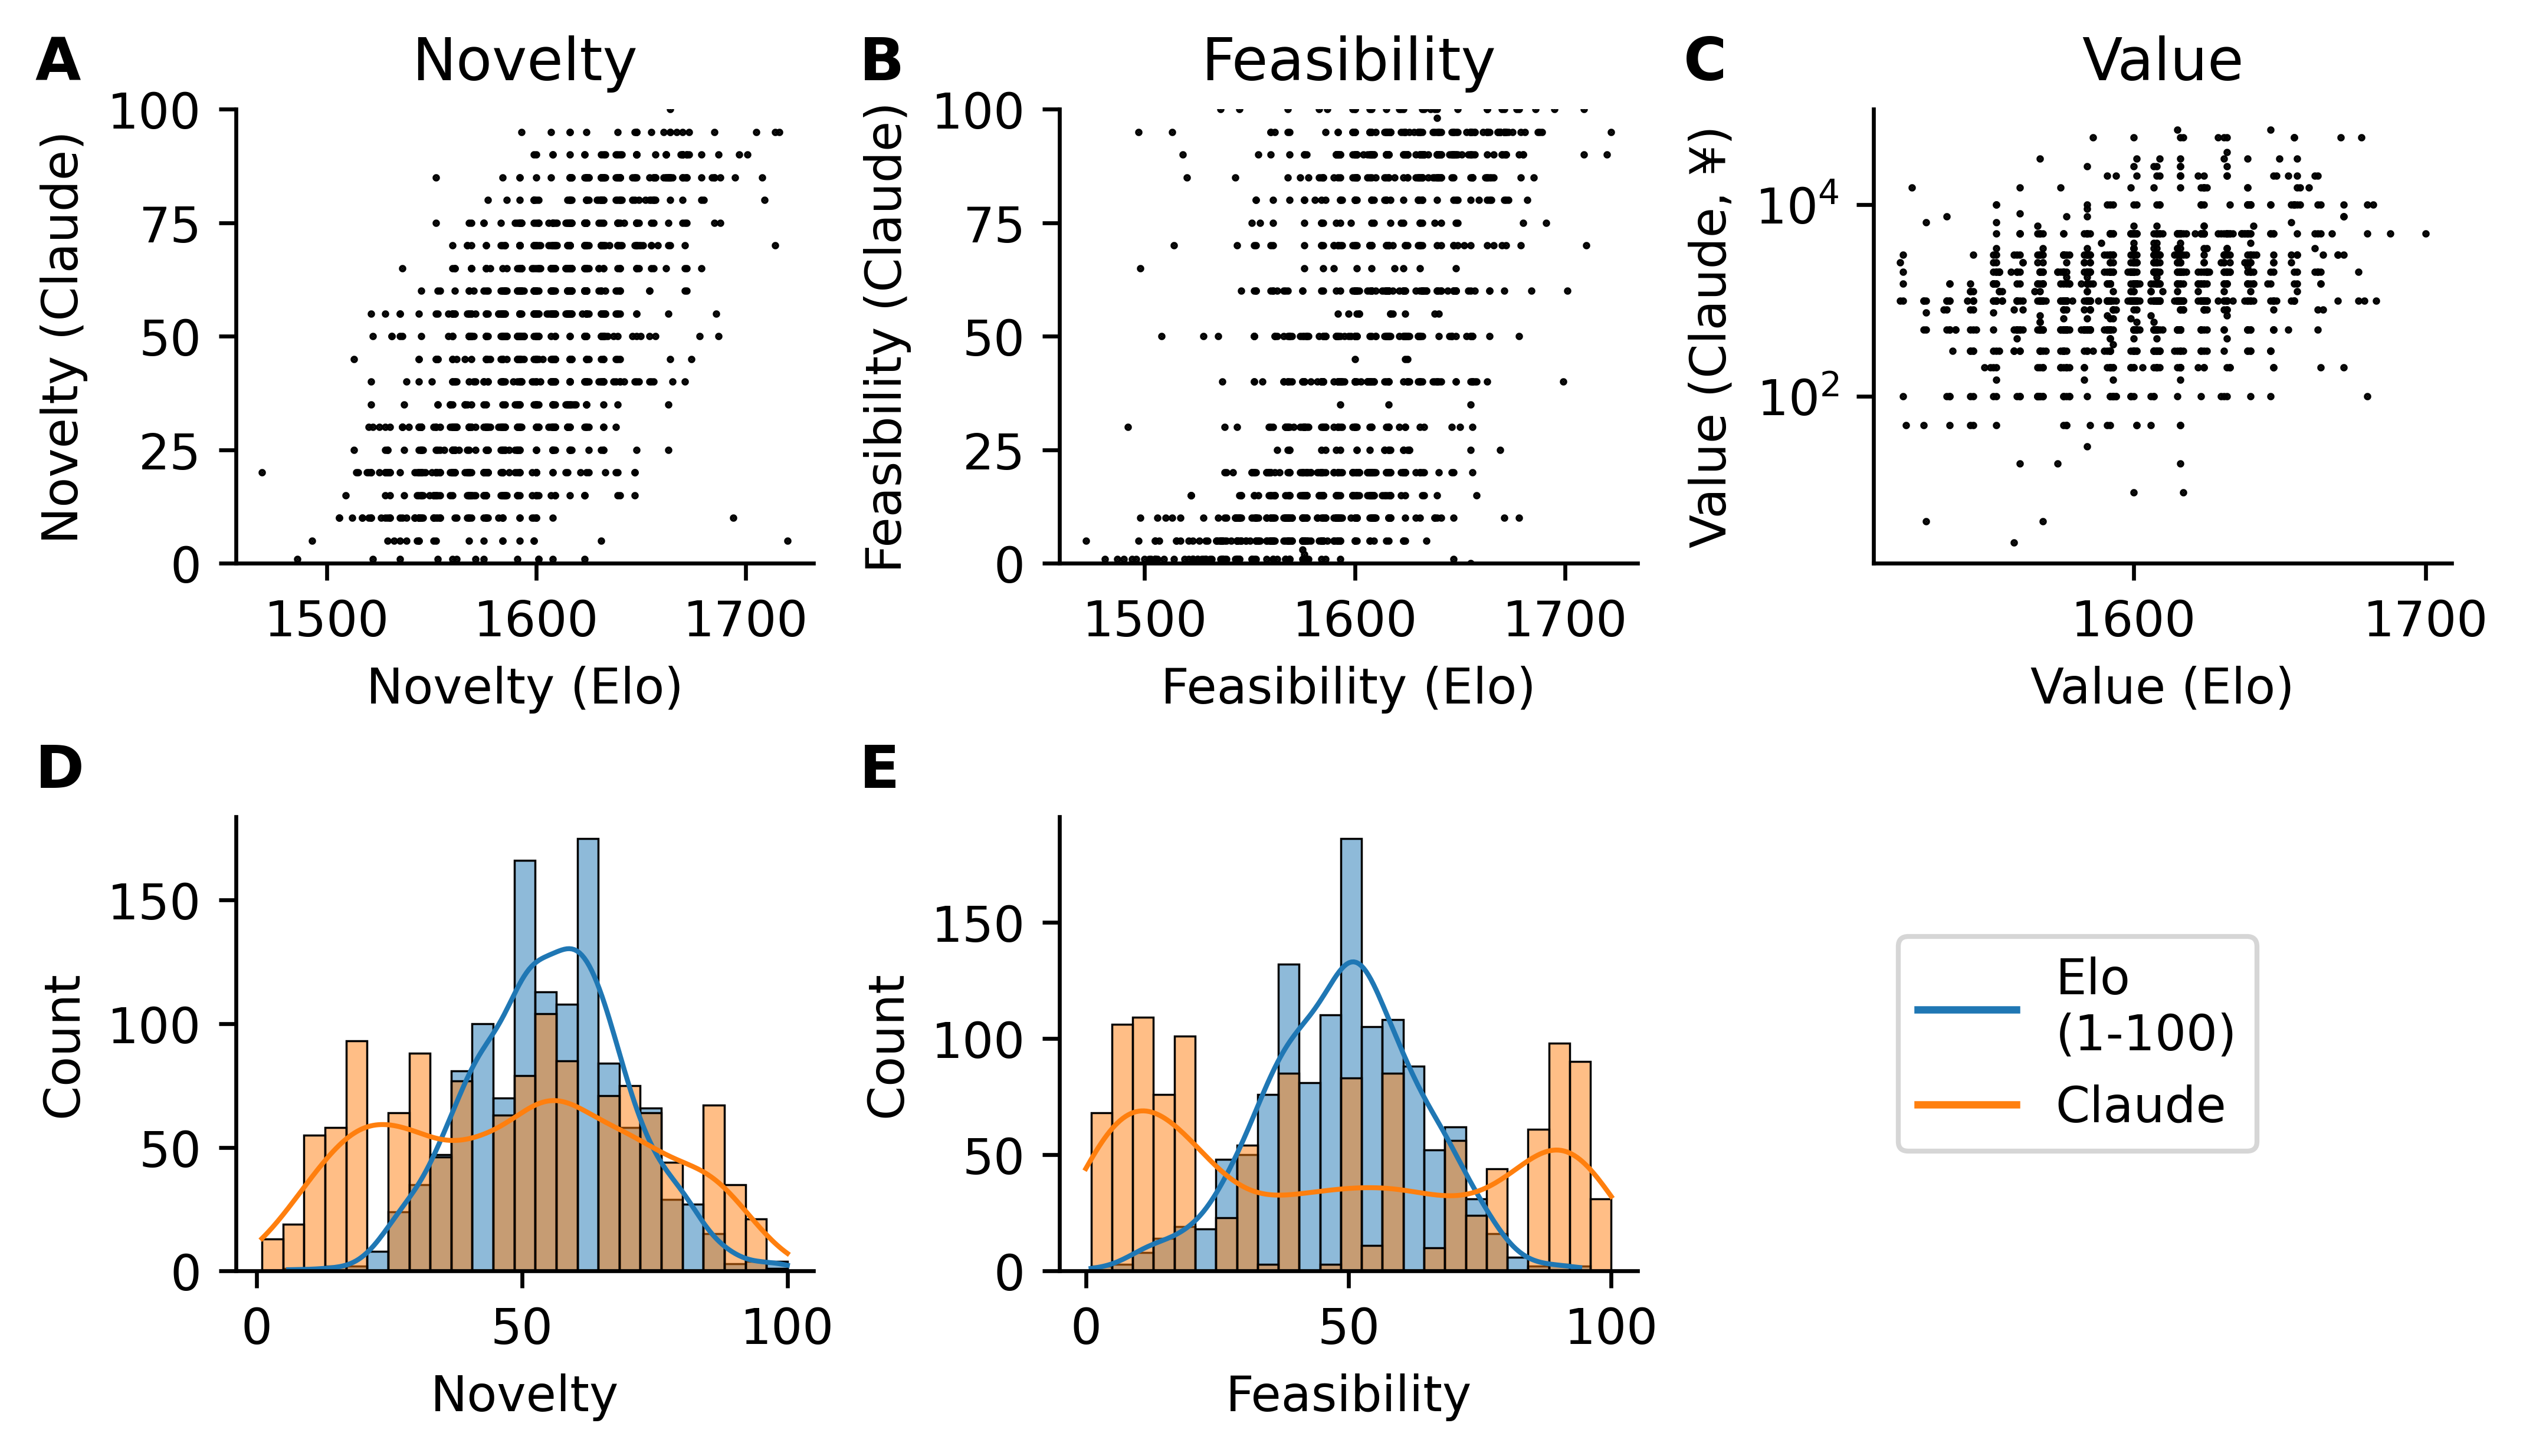

In [12]:
fig, axs = plt.subplots(2, 3, figsize=(7,4), layout='constrained', dpi=600)
for measure, ax in zip(annotate.measures, axs.T):
    Measure = measure.capitalize()
    if measure == 'value':
        mask = (source['value']>0) & (source['value']<100000)
        suffix = ', ¥'
        ax[0].semilogy(source[mask][Measure], source[mask][measure], 'ok', ms=.5)
    else:
        suffix = ''
        ax[0].plot(source[Measure], source[measure], 'ok', ms=.5)
    ax[0].set_xlabel(f'{Measure} (Elo)')
    ax[0].set_ylabel(f'{Measure} (Claude{suffix})')
    ax[0].set_title(Measure)
    if measure != 'value':
        ax[0].set_ylim(0,100)

    if measure != 'value':
        sns.histplot(source, x=f'{measure}_transformed', ax=ax[1], kde=True, bins=25, binrange=(1,100), line_kws={'lw':1})
        sns.histplot(source, x=measure, ax=ax[1], kde=True, bins=25, binrange=(1,100), line_kws={'lw':1})
        ax[1].set_xlabel(Measure)

axs[1,2].plot([], label='Elo\n(1-100)')
axs[1,2].plot([], label='Claude')
axs[1,2].legend(loc='center left')
axs[1,2].set_xticks([])
axs[1,2].set_yticks([])

sns.despine()
sns.despine(ax=axs[1,2], bottom=True, left=True)

for i, ax in enumerate(axs.flatten()):
    if i < 5:
        plot_utils.label_panel(ax, i)

# plt.savefig(f'Figure_2.{fname}.pdf')

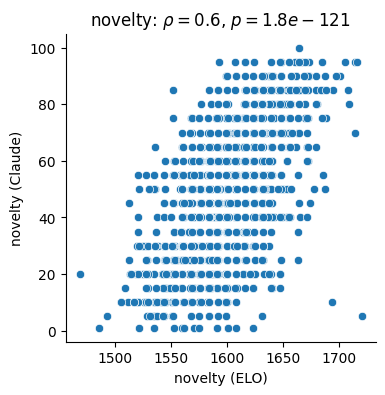

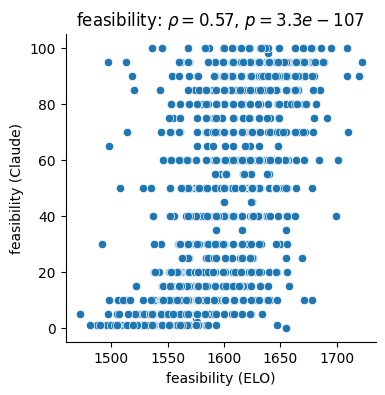

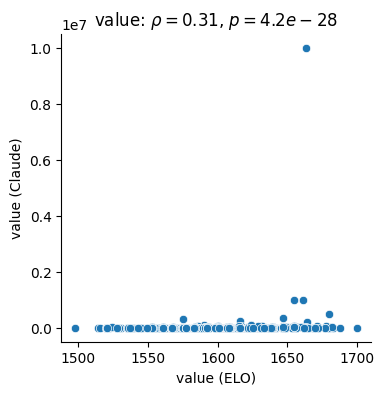

In [13]:
for key, c in corr.items():
    plt.figure(figsize=(4,4))
    sns.scatterplot(source, x=key.capitalize(), y=key)
    sns.despine()
    plt.xlabel(f'{key} (ELO)')
    plt.ylabel(f'{key} (Claude)')
    plt.title(f'{key}: $\\rho = {c.statistic:.2g}$, $p = {c.pvalue:.2g}$')

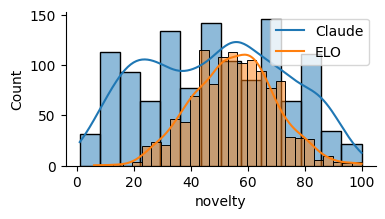

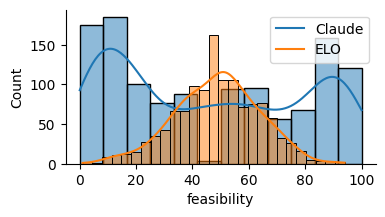

In [14]:
for key in ('novelty', 'feasibility'):
    fig, ax = plt.subplots(figsize=(4,2))
    sns.histplot(source, x=key, ax=ax, kde=True)
    sns.histplot(source, x=f'{key}_transformed', ax=ax, kde=True)
    sns.despine()
    plt.plot([], label='Claude')
    plt.plot([], label='ELO')
    plt.legend()

In [15]:
for idx, row in source[source['value']<0].iterrows():
    print(row['Question'], row['Answer'], row['value_explanation'], sep='\n', end='\n\n')

In [16]:
for idx, row in source[source['value'] > 100000].iterrows():
    print(row['Question'], row['Answer'], row['value'], row['value_idea_explanation'], row['value_explanation'], sep='\n', end='\n\n')

傘
パラシュート
350000
3. Using an umbrella as a parachute
Recreational parachutes cost around 200,000 to 500,000 yen

コルク
家の建築
200000
20. Using cork for house construction
Existing building materials vary widely, but specialty materials can cost 100,000 to 1,000,000 yen

レンガ
教室
1000000
18. Using bricks to build a classroom
Existing prefab classrooms can cost millions of yen

傘
乗り物
250000
19. Using an umbrella as a vehicle
Small personal vehicles cost around 50,000 to 500,000 yen

レンガ
家
10000000
28. Using bricks to build a house
Existing houses can cost millions of yen

ビー玉
パチンコ
300000
22. Using marbles for pachinko
Existing pachinko machines can cost 200000 to 500000 yen

コルク
住居
1000000
40. Using cork for housing
Existing small housing structures can cost 500,000 to 5,000,000 yen

テープ
家の外壁
500000
45. Using tape on house exterior walls
This is impractical, but exterior wall coverings can cost 100,000-1,000,000 JPY for a house.



Text(0.5, 1.0, 'value: $\\rho = 0.3$, $p = 3.9e-26$')

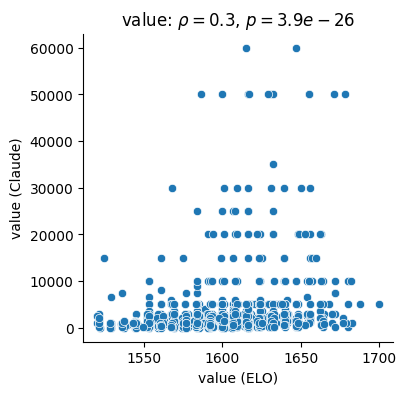

In [17]:
mask = (source['value']>0) & (source['value']<100000)
vcorr = stats.spearmanr(source[mask][['Value', 'value']])
plt.figure(figsize=(4,4))
sns.scatterplot(source[mask], x='Value', y='value')
sns.despine()
plt.xlabel(f'value (ELO)')
plt.ylabel(f'value (Claude)')
plt.title(f'value: $\\rho = {vcorr.statistic:.2g}$, $p = {vcorr.pvalue:.2g}$')

In [18]:
print(source[(source['Question']=='ボールペン')*(source['Answer']=='冷蔵庫')]['novelty_raw'].item())

23. Using a ballpoint pen as a refrigerator
This idea is highly imaginative and extremely novel. It's nearly impossible to conceive how a pen could be used as a refrigerator, making it very surprising and unique.
{"novelty":95}
